In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Steps in this project
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building 
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# no use of last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace =True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['target'].value_counts()
#only 2 kinds of values to better we convert them to binary 0 for non spam 1 for spam

ham     4825
spam     747
Name: target, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#label encoding done for output variable whee we can divide them in classes
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking duplicate values
df.duplicated().sum()

403

In [16]:
# removing duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2. EDA
to get understanding of data

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x147e44eddc0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

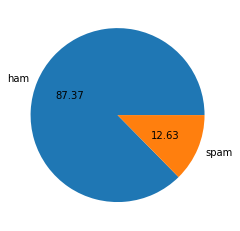

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

we can see that data is imbalanced

In [25]:
import nltk
# nlp library to perform NLP operations like tokenisation, stemming, TFiDF etc.

In [27]:
df['num_char']=df['text'].apply(len)
#apply keyword is used to apply function 
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['words_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,words_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_char','words_count','sentence_count']].describe()

,num_char,words_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# for ham messages we can see difference in mean btw spam and ham messages
df[df['target']==0][['num_char','words_count','sentence_count']].describe()

,num_char,words_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==1][['num_char','words_count','sentence_count']].describe()

,num_char,words_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


mean of both ham and spam shopws that spam messages have around 3 sentences and ham messages have around 2 sentences on an avg.

<AxesSubplot:xlabel='num_char', ylabel='Count'>

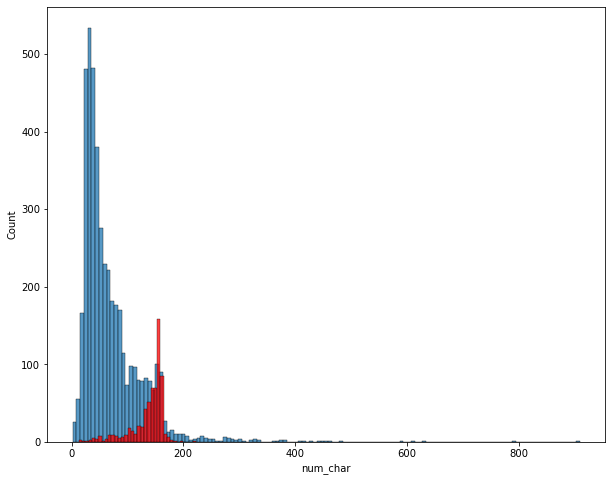

In [38]:
# we can see difference using histplots
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.histplot(df[df['target']==0]['num_char']) # for ham 
sns.histplot(df[df['target']==1]['num_char'],color='red') # for spam

<AxesSubplot:xlabel='words_count', ylabel='Count'>

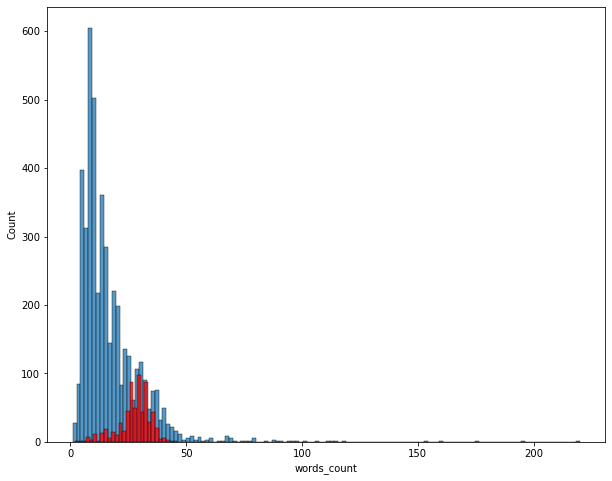

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['target']==0]['words_count']) # for ham 
sns.histplot(df[df['target']==1]['words_count'],color='red') # for spam

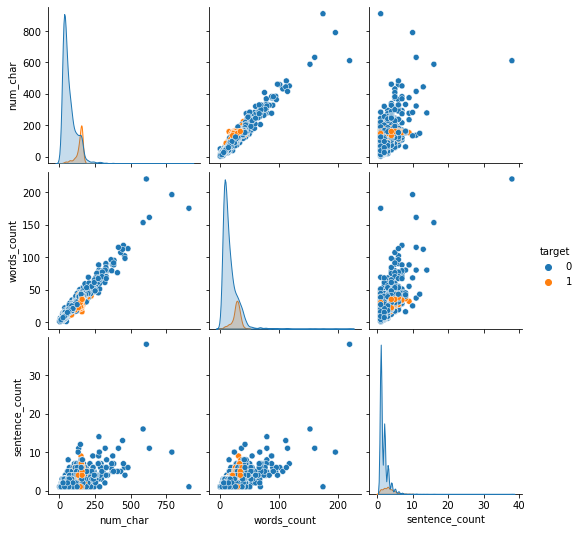

In [41]:
# to check outliers
sns.pairplot(df,hue='target')

<AxesSubplot:>

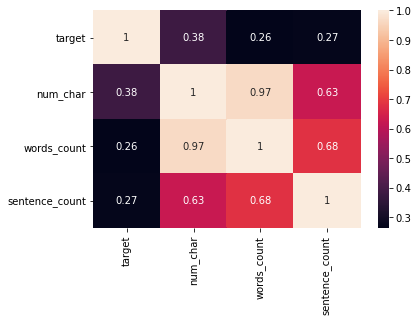

In [42]:
sns.heatmap(df.corr(),annot=True) 

we can see a high correlation btw num_char & words_count = 0.97 and num_chars & sentence_count = 0.63 so we will use only one of them in model building

## 3.Data Preprocessing
- Lower case
- Tokenisation
- Removing special characters
- Removing stop words and punctuation
- Stemming or Lemmatization

In [63]:
from nltk.corpus import stopwords
# stopwords.words('english') 
# used for sentence formation not having any meaning
import re
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [64]:
len(df)

5169

In [65]:
# making function to perform all steps 
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum(): # to remove non alpha numjeric characters in our text
            y.append(i)
    text=y[:] # copy like this otherwise it will affect text also 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [70]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [71]:
df['transformed_text']=df['text'].apply(transform_text)

In [72]:
df.head()

,target,text,num_char,words_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


from now on we will use tranformed_text column

In [88]:
# using wordcloud module to see what words are repeating in spam messages
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

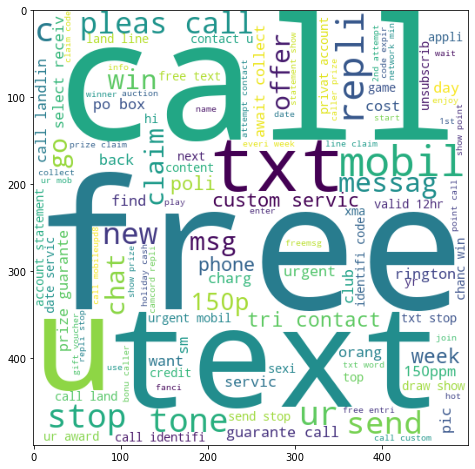

In [90]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

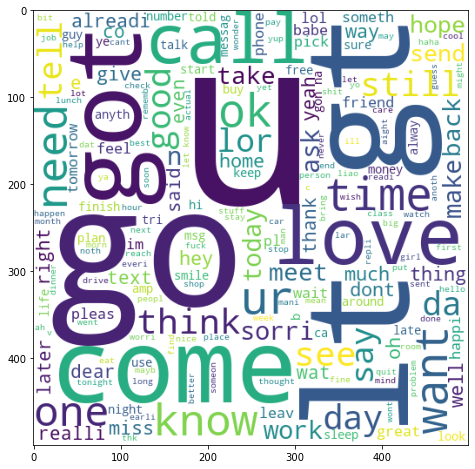

In [91]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)

In [95]:
# top 30 spam words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [105]:
# spam_corpus
# now we have spam words 
# but we need top 30 spam words so using counter from collection library
from collections import Counter
count_spam=pd.DataFrame(Counter(spam_corpus).most_common(30))
count_spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


C:\Users\AKSHAT RAI LADDHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='0'>

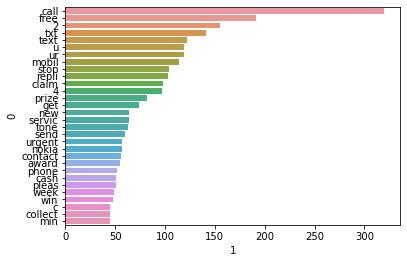

In [106]:
# showing in a bar plot for better comparision
sns.barplot(count_spam[1],count_spam[0])

Note: These all plotting and words counts helps in data interpretation which is very important for understanding how model will work on any input we will provide 

## 4. Model Building

using naive bayes as starting model and then we will compare with other models whichever performs better

In [156]:
#text vectorisation
# using bag of words or tf*idf (tfidf is better than BOW)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
# 1. Tfidf max_features:which is number of features we take on every time for vectorise

In [157]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [158]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [160]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

#precisin score is important as model should be precise about spam messages
# and data is imbalaced so accuracy is not that important than precison
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [161]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("accuracy_score: ",accuracy_score(y_test,y_pred1))
print("Precison score: ",precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

accuracy_score:  0.8704061895551257
Precison score:  0.509090909090909
[[788 108]
 [ 26 112]]


In [162]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print("accuracy_score: ",accuracy_score(y_test,y_pred2))
print("Precison score: ",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

accuracy_score:  0.971953578336557
Precison score:  1.0
[[896   0]
 [ 29 109]]


In [163]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print("accuracy_score: ",accuracy_score(y_test,y_pred3))
print("Precison score: ",precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

accuracy_score:  0.9835589941972921
Precison score:  0.991869918699187
[[895   1]
 [ 16 122]]


best precision is given by multinomial naive bayes with TfIdf vectorizer for now

In [164]:
# now checking with all other classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [165]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [166]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [167]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [168]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [169]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.85
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918


In [170]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.975822,0.982906
8,ETC,0.979691,0.975610
0,SVC,0.974855,0.974576
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231
3,DT,0.934236,0.850000


from this we can see that Naive Bayes gives us the best result in terms of both accuracy and precision

Model improvement can be done by changing max_features in tfidf vectoriser, scaling the features using min_max_scaler but not necesaarily they will give best result so these are trials that we have to do on our model


In [172]:
import pickle
pickle.dump(tfidf,open('vectorsizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))